In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import spearmanr
from statsmodels.nonparametric.smoothers_lowess import lowess

In [19]:
# Make global settings for the figures.
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams["mathtext.default"] = 'regular'
plt.rcParams["legend.labelcolor"] = 'black'
mpl.rcParams['pdf.fonttype'] = 42
# This is for using seaborn
sns.set_theme(style="white")
sns.set_style('ticks')
# File Paths
save_path = '../figures/'
# data_path = "../data_files/data.xlsx"
data_path = "../data_files/lit_data.xlsx"
f_size = 12

In [20]:
mj = pd.read_excel(data_path, sheet_name='Majiashan')
mm = pd.read_excel(data_path, sheet_name='MM_USA')
js = pd.read_excel(data_path, sheet_name='Jesmond')
md = pd.read_excel(data_path, sheet_name='Mud')
wp = pd.read_excel(data_path, sheet_name='WPDS')
jia = pd.read_excel(data_path, sheet_name='Jiarong')
lg = pd.read_excel(data_path, sheet_name='Lower Guandao')
sh = pd.read_excel(data_path, sheet_name='Shitouzhai')
age_sulfur = pd.read_excel(data_path, sheet_name='aged_sulfur')
age_d13C = pd.read_excel(data_path, sheet_name='aged_d13C')


In [21]:
x = [mj.d13C, mj.d34S, mm.d13C, mm.d34S, js.d13C, js.d34S, md.d34S,
     wp.d13C, wp.d34S, jia.d13C, jia.d34S, lg.d34S, sh.d13C, sh.d34S]
y = [mj.height, mm.height, js.height, md.height, wp.height, jia.height, lg.height, sh.height]
label_Ccarb = r'$\delta^{13}C_{carb}\;(‰\;VPDB)$'
label_d34S = r'$\delta^{34}S_{CAS}\;(‰\;VCDT)$'
color = ["#838383", "#e76f51"]

# Majiashan

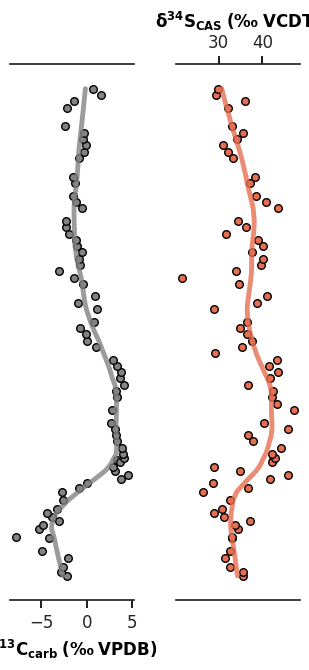

In [22]:
# Create figure and subplots within the figure.
fig, axes = plt.subplots(figsize=(3.5, 6),  # constrained_layout=True,
                         ncols=2, nrows=1, sharey=True)
ax0, ax1= axes
axes_ = [ax0, ax1]

x_axis = [x[0], x[1]]
y_axis = [y[0]]*2
labels = [label_Ccarb, label_d34S]

# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=False, bottom=False)
plt.yticks([])
plt.tight_layout()

s_factor = 0.25  # a smoothing factor of 0.25 is used.

def scatter_plot(f_size,f_name):
    for i in range(len(axes_)):
        sns.scatterplot(x=x_axis[i], y=y_axis[i], ax=axes_[i],
                        color=color[i], legend=False, edgecolor='black',
                        s=30, linewidth=1,
                        )
        axes_[i].tick_params(labelsize=f_size, color="black")
        axes_[i].set_xlabel(labels[i], fontsize=f_size,
                            c="black", fontweight="bold")
        # Set the x-axis position based on the subplot index
        if i % 2 == 0:
            axes_[i].xaxis.set_ticks_position('bottom')  # x-axis at the bottom
            axes_[i].xaxis.set_label_position('bottom')  # x-axis at the bottom
        else:
            axes_[i].xaxis.set_ticks_position('top')  # x-axis at the top
            axes_[i].xaxis.set_label_position('top')  # x-axis at the top
        smoothed = lowess(x_axis[i], y_axis[i], frac=s_factor)
        axes_[i].plot(smoothed[:, 1], smoothed[:, 0],
                      c=color[i], linewidth=3.5, alpha=.8)
    plt.savefig(f"{save_path}{f_name}.pdf", dpi=600)

# def smoothed_line():
#     for i in range(len(axes_)):
#         axes_[i].plot(smoothed[i][:, 1], smoothed[i][:, 0],
#                     c=color[i], linewidth=3.5, alpha=.8)
        
scatter_plot(12,'Majiashan')

# Mineral Mountain

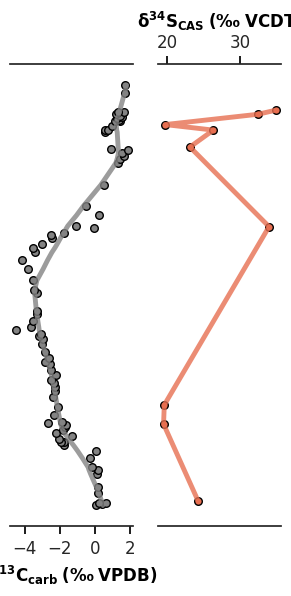

In [23]:
# Create figure and subplots within the figure.
fig, axes = plt.subplots(figsize=(3.5, 6),  # constrained_layout=True,
                         ncols=2, nrows=1, sharey=True)
ax0, ax1 = axes
axes_ = [ax0, ax1]
# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=False, bottom=False)
plt.yticks([])

x_axis = [mm.d13C, mm.d34S]
y_axis = [mm.height, mm.height_n]

ax0.set_xticks([-4, -2, 0, 2])
scatter_plot(f_size,'MM')

# Jesmond

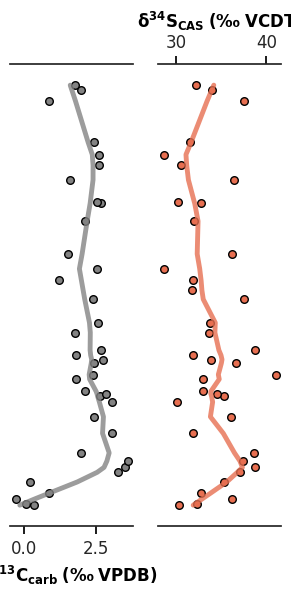

In [24]:
# Create figure and subplots within the figure.
fig, axes = plt.subplots(figsize=(3.5, 6),  # constrained_layout=True,
                        ncols=2, nrows=1, sharey=True)
ax0, ax1 = axes
axes_ = [ax0, ax1]
# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=False, bottom=False)
plt.yticks([])

x_axis = [js.d13C, js.d34S]
y_axis = [js.height]*2

scatter_plot(f_size,"Jesmond")


# Mud

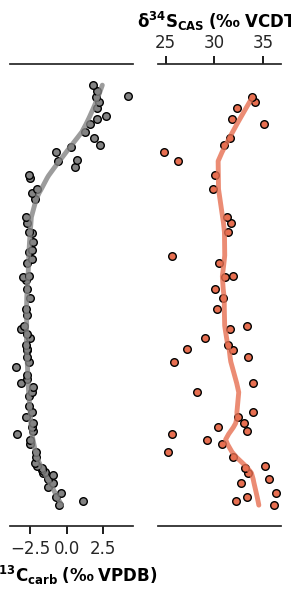

In [25]:
# Create figure and subplots within the figure.
fig, axes = plt.subplots(figsize=(3.5, 6),  # constrained_layout=True,
                         ncols=2, nrows=1, sharey=True)
ax0, ax1 = axes
axes_ = [ax0, ax1]
# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=False, bottom=False)
plt.yticks([])

x_axis = [md.d13C, md.d34S]
y_axis = [md.pos_d13C, md.height]

scatter_plot(f_size, "Mud")


# West Pingdingshan

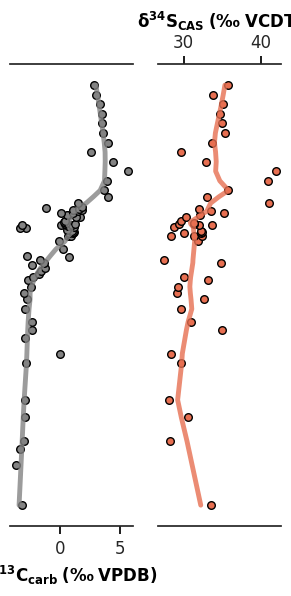

In [26]:
# Create figure and subplots within the figure.
fig, axes = plt.subplots(figsize=(3.5, 6),  # constrained_layout=True,
                         ncols=2, nrows=1, sharey=True)
ax0, ax1 = axes
axes_ = [ax0, ax1]
# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=False, bottom=False)
plt.yticks([])

x_axis = [wp.d13C, wp.d34S]
y_axis = [wp.height]*2

scatter_plot(f_size, "WPDS")


# Jiarong

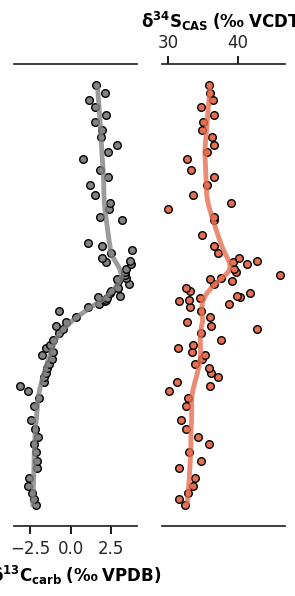

In [27]:
# Create figure and subplots within the figure.
fig, axes = plt.subplots(figsize=(3.5, 6),  # constrained_layout=True,
                         ncols=2, nrows=1, sharey=True)
ax0, ax1 = axes
axes_ = [ax0, ax1]
# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=False, bottom=False)
plt.yticks([])

x_axis = [jia.d13C, jia.d34S]
y_axis = [jia.height]*2

scatter_plot(f_size, "Jiarong")


# Shitouzhai


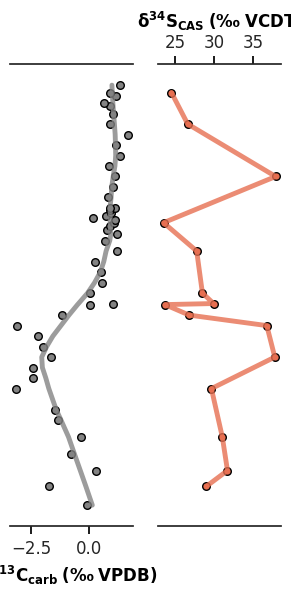

In [28]:
# Create figure and subplots within the figure.
fig, axes = plt.subplots(figsize=(3.5, 6),  # constrained_layout=True,
                         ncols=2, nrows=1, sharey=True)
ax0, ax1 = axes
axes_ = [ax0, ax1]
# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=False, bottom=False)
plt.yticks([])

x_axis = [sh.d13C, sh.d34S]
y_axis = [sh.height]*2

scatter_plot(f_size, "Shitouzhai")


Lower Guandao

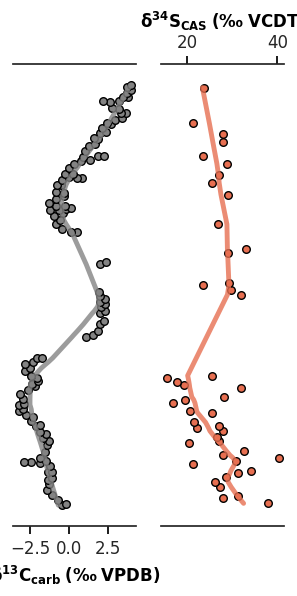

In [29]:
# Create figure and subplots within the figure.
fig, axes = plt.subplots(figsize=(3.5, 6),  # constrained_layout=True,
                         ncols=2, nrows=1, sharey=True)
ax0, ax1 = axes
axes_ = [ax0, ax1]
# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=False, bottom=False)
plt.yticks([])

x_axis = [lg.d13C, lg.d34S]
y_axis = [lg.d13C_height, lg.height]

scatter_plot(f_size, "l_Guandao")


Plot of all data according to absolute age

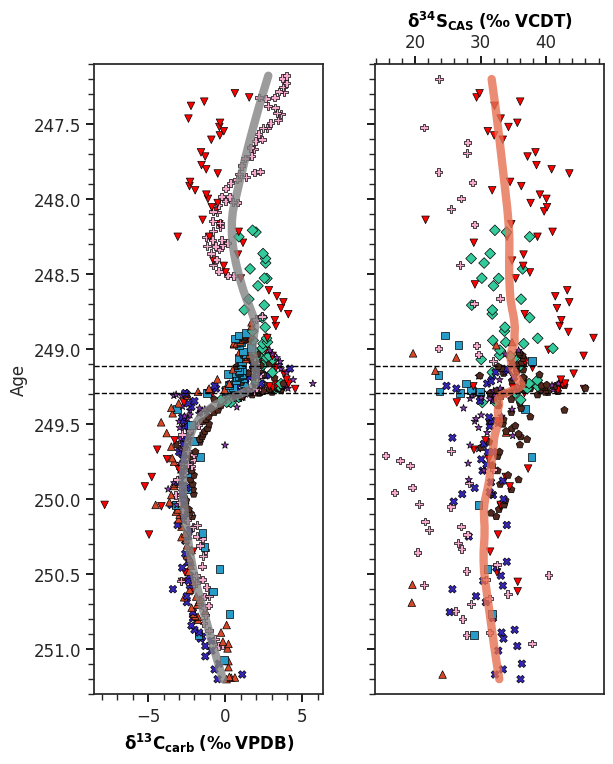

In [30]:
# Create figure and subplots within the figure.
fig, axes = plt.subplots(figsize=(6, 7),  # constrained_layout=True,
                         ncols=2, nrows=1, sharey=True)
ax0, ax1 = axes
axes_ = [ax0, ax1]
color = ["#838383", "#e76f51"]
x_axis = [age_d13C["d13C"], age_sulfur["d34S"]]
y_axis = [age_d13C["Age"], age_sulfur["Age"]]
labels = [label_Ccarb, label_d34S]
markers = ["^", "X", 's', 'P', 'v', 'p', '*', 'D',]
markers1 = [ "X","^", 'P', 's', 'v', 'p', '*', 'D']
colors = ["#d84727", "#3625be", "#289cc9", "#f7accf",
          "red", "#51291e", "#903AB8", '#33cb9c']

colors1 = ["#3625be", "#d84727", "#f7accf", "#289cc9",
           "red", "#51291e", "#903AB8",'#33cb9c', ]
color_use = [colors, colors1]
marker_use = [markers, markers1]
plt.tight_layout()

s_factor = 0.25  # a smoothing factor of 0.25 is used.
data = [age_d13C, age_sulfur]

def scatter_plot(f_size, f_name):
    for i in range(len(axes_)):
        sns.scatterplot(data = data[i], x=x_axis[i], y=y_axis[i], ax=axes_[i],hue="Locality",
                        edgecolor='black', style = "Locality",
                        s=30, linewidth=.5, alpha=1, 
                        legend=False,
                        palette=color_use[i],
                        markers = marker_use[i]
                        )
        axes_[i].tick_params(labelsize=f_size, color="black")
        axes_[i].set_xlabel(labels[i], fontsize=f_size,
                            c="black", fontweight="bold")
        axes_[i].minorticks_on()
        # Set the x-axis position based on the subplot index
        if i % 2 == 0:
            axes_[i].xaxis.set_ticks_position('bottom')  # x-axis at the bottom
            axes_[i].xaxis.set_label_position('bottom')  # x-axis at the bottom
        else:
            axes_[i].xaxis.set_ticks_position('top')  # x-axis at the top
            axes_[i].xaxis.set_label_position('top')  # x-axis at the top
        smoothed = lowess(x_axis[i], y_axis[i], frac=s_factor)
        axes_[i].plot(smoothed[:, 1], smoothed[:, 0],
                      c=color[i], linewidth=6, alpha=.8)
        axes_[i].axhline(y=249.292, linewidth=1, color='black', linestyle='--')
        axes_[i].axhline(y=249.110, linewidth=1, color='black', linestyle='--')
        axes_[i].set_ylim(247.1, 251.3)
        
    plt.gca().invert_yaxis()
    # plt.legend(loc='upper left',edgecolor='black',)
    
    plt.savefig(f"{save_path}{f_name}.pdf", dpi=600)
    # Invert the y-axis
    

scatter_plot(12, "CAS_age")

In [31]:
carbon = pd.read_excel("../data_files/data.xlsx", sheet_name="ages_d13C")
sulfur = pd.read_excel("../data_files/data.xlsx", sheet_name="ages_d34S")
oxygen = pd.read_excel("../data_files/data.xlsx", sheet_name="ages_d18O")
colors1 = ['#FF9800', '#388E3C','#7B1FA2']
colors2 = ['#7B1FA2', '#388E3C','#FF9800']
colors=[colors1, colors1, colors1]

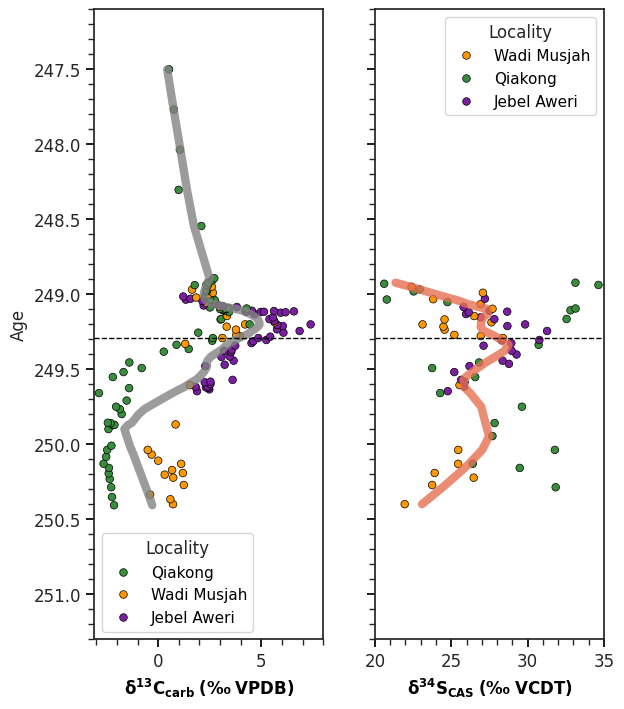

In [32]:
# Create figure and subplots within the figure.
fig, axes = plt.subplots(figsize=(6, 7),  # constrained_layout=True,
                         ncols=2, nrows=1, sharey=True)
ax0, ax1 = axes
axes_ = [ax0, ax1]
label_d18O = r'$\delta^{18}O_{CAS}\;(‰\;SMOW)$'
color = ["#838383", "#e76f51"]
x_axis = [carbon["d13C"], sulfur["d34S"]]
y_axis = [carbon["Age"], sulfur["Age"],]
labels = [label_Ccarb, label_d34S]
colors3 = ['#388E3C','#FF9800', '#7B1FA2'] #QIA, WMJ, JA,
colors4 = ['#FF9800','#388E3C', '#7B1FA2'] # WMJ, QIA, JA,
xlims = [(-3.1,8),(20,35)]
plt.tight_layout()
colors=[colors3, colors4]

data = [carbon, sulfur]

for ax in axes_:
    ax.invert_yaxis()

for i in range(len(axes_)):
    sns.scatterplot(data=data[i], x=x_axis[i], y=y_axis[i], ax=axes_[i], hue="Locality",
                    color='black', edgecolor='black', palette = colors[i],
                    s=30, linewidth=.5, alpha=1,
                    )
    axes_[i].tick_params(labelsize=f_size, color="black")
    axes_[i].set_xlabel(labels[i], fontsize=f_size,
                        c="black", fontweight="bold")
    axes_[i].minorticks_on()
    smoothed = lowess(x_axis[i], y_axis[i], frac=s_factor)
    axes_[i].plot(smoothed[:, 1], smoothed[:, 0], c=color[i], linewidth=6, alpha=.8)

    axes_[i].axhline(y=249.292, linewidth=1, color='black', linestyle='--')
    axes_[i].set_xlim(xlims[i])
    axes_[i].set_ylim(247.1, 251.3)
plt.gca().invert_yaxis()

    
plt.savefig(f"{save_path}QIA_ageplot.pdf", dpi=600)

# smoothed_all = lowess(x_axis[i], y_axis[i], frac=s_factor)
# axes_[i].plot(smoothed_all[:, 1], smoothed_all[:, 0],
#               c=color[i], linewidth=6, alpha=.8)


In [33]:
data2_path = "../data_files/data2.xlsx"

carbon = pd.read_excel(data2_path, sheet_name="ages_d13C")
sulfur = pd.read_excel(data2_path, sheet_name="ages_d34S")
oxygen = pd.read_excel(data2_path, sheet_name="ages_d18O")
colors1 = ['#FF9800', '#7B1FA2']
colors2 = ['#7B1FA2', '#FF9800']
colors=[colors1, colors1, colors1]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


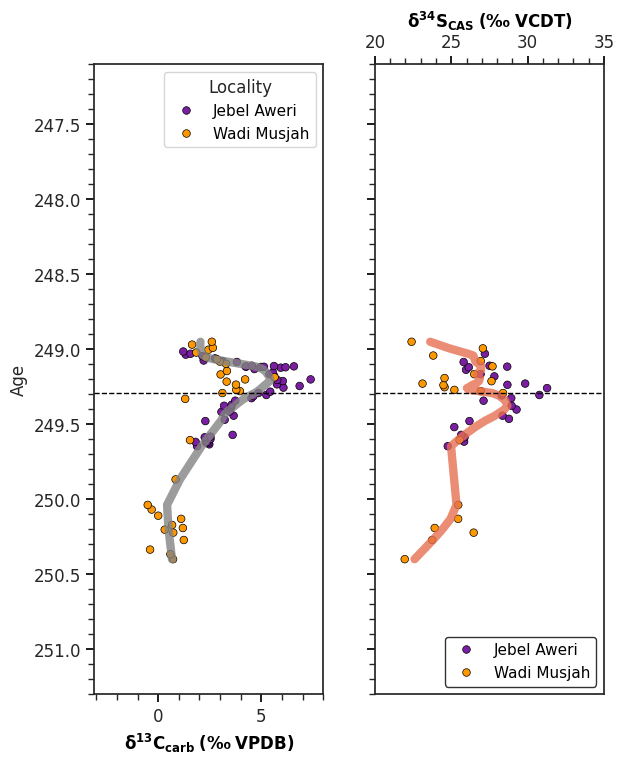

In [34]:
# Create figure and subplots within the figure.
fig, axes = plt.subplots(figsize=(6, 7),  # constrained_layout=True,
                         ncols=2, nrows=1, sharey=True)
ax0, ax1 = axes
axes_ = [ax0, ax1]
label_d18O = r'$\delta^{18}O_{CAS}\;(‰\;SMOW)$'
color = ["#838383", "#e76f51"]
x_axis = [carbon["d13C"], sulfur["d34S"]]
y_axis = [carbon["Age"], sulfur["Age"]]
labels = [label_Ccarb, label_d34S]
colors3 = ['#FF9800', '#7B1FA2']

plt.tight_layout()

data = [carbon, sulfur]
xlims = [(-3.1,8),(20,35 )]
# scatter_plot(12, "mydata_age")

for i in range(len(axes_)):
    sns.scatterplot(data=data[i], x=x_axis[i], y=y_axis[i], ax=axes_[i], hue="Locality",
                    color='black', edgecolor='black', hue_order=["Jebel Aweri", "Wadi Musjah"],
                    s=30, linewidth=.5, alpha=1, palette=colors2,
                    )
    axes_[i].tick_params(labelsize=f_size, color="black")
    axes_[i].set_xlabel(labels[i], fontsize=f_size,
                          c="black", fontweight="bold")
    axes_[i].minorticks_on()
       # Set the x-axis position based on the subplot index
    if i % 2 == 0:
        axes_[i].xaxis.set_ticks_position('bottom')  # x-axis at the bottom
        axes_[i].xaxis.set_label_position('bottom')  # x-axis at the bottom
    else:
        axes_[i].xaxis.set_ticks_position('top')  # x-axis at the top
        axes_[i].xaxis.set_label_position('top')  # x-axis at the top
    smoothed_all = lowess(x_axis[i], y_axis[i], frac=s_factor)
    axes_[i].plot(smoothed_all[:, 1], smoothed_all[:, 0],
                c=color[i], linewidth=6, alpha=.8)
    # np.savetxt(f'smoothed_all{i}.txt', smoothed_all, delimiter = ',')
    axes_[i].axhline(y=249.292, linewidth=1, color='black', linestyle='--')
    plt.legend(loc='lower right', edgecolor='black',)
    axes_[i].set_ylim(247.1, 251.3)
    axes_[i].set_xlim(xlims[i])
plt.gca().invert_yaxis()


plt.savefig(f"{save_path}Oman_ageplot.pdf", dpi=600)

# Oman_smoothed_d34S = lowess(x_axis[1], y_axis[1], frac = s_factor)
# Oman_smoothed_d13C = lowess(x_axis[0], y_axis[0], frac = s_factor)
# df=pd.DataFrame(Oman_smoothed_d34S)
# df2=pd.DataFrame(Oman_smoothed_d13C)
# df.to_excel('../data_files/smooth_Oman2.xlsx')

# with pd.ExcelWriter("../data_files/smooth_Oman2.xlsx", engine="openpyxl", mode='a', if_sheet_exists='overlay') as writer:
#     df2.to_excel(writer, sheet_name='d13C',
#                         index=True, float_format="%.3f")